In [59]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
file = Path('crypto_data.csv')

In [3]:
df = pd.read_csv(file, index_col=0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [4]:
# List all algorithms in use


{'Argon2d', 'Blake2S', 'Quark', 'VeChainThor Authority', 'M00N', 'Equihash', 'CryptoNight Heavy', 'TRC10', '1GB AES Pattern Search', 'Zhash', 'Cryptonight-GPU', 'X11GOST', 'CryptoNight-V7', 'POS 2.0', 'CryptoNight-Lite', 'Leased POS', 'IMesh', 'X16R', 'PHI2', 'VBFT', 'X15', 'Cloverhash', 'Groestl', 'HMQ1725', 'Shabal256', 'Lyra2RE', 'SHA-256D', 'Slatechain', 'SHA-256', 'Stanford Folding', 'BLAKE256', 'X16S', 'Progressive-n', 'Dagger', 'Equihash1927', 'ScryptOG', 'Avesta hash', 'Time Travel', 'SHA-512', 'Momentum', 'Curve25519', 'Jump Consistent Hash', 'SHA3-256', 'PHI1612', 'QUAIT', 'X14', 'CryptoNight', 'XEVAN', 'C11', 'POS 3.0', 'Argon2', 'T-Inside', 'Proof-of-BibleHash', 'Blake', 'XG Hash', 'DPoS', 'Skein', 'Blake2b', 'CryptoNight-lite', 'QuarkTX', 'NeoScrypt', 'SHA3', 'Proof-of-Authority', 'Semux BFT consensus', 'Rainforest', 'YescryptR16', 'NIST5', 'Lyra2REv2', 'HybridScryptHash256', 'X11', 'QuBit', '536', 'PoS', 'Equihash+Scrypt', 'SkunkHash', 'Scrypt', 'Counterparty', 'SkunkHash

In [18]:
list(df['Algorithm'].unique())

['Scrypt',
 'X11',
 'SHA-256',
 'X13',
 'Ethash',
 'CryptoNight-V7',
 'Equihash',
 'SHA-512',
 'Multiple',
 'X15',
 'NIST5',
 'Quark',
 'Groestl',
 'PoS',
 'NeoScrypt',
 'SHA3',
 'HybridScryptHash256',
 'Scrypt-n',
 'PHI1612',
 'Lyra2REv2',
 'CryptoNight',
 'Shabal256',
 'Counterparty',
 'Blake',
 'Momentum',
 'Stanford Folding',
 'QuBit',
 'XG Hash',
 'M7 POW',
 'Curve25519',
 'Lyra2RE',
 'QUAIT',
 'vDPOS',
 'Blake2b',
 'BLAKE256',
 '1GB AES Pattern Search',
 'Dagger',
 'CryptoNight-Lite',
 'X11GOST',
 'ScryptOG',
 'SHA-256D',
 'POS 3.0',
 'Progressive-n',
 'DPoS',
 'Lyra2Z',
 'X14',
 'Time Travel',
 'Argon2',
 'Keccak',
 'Blake2S',
 'Dagger-Hashimoto',
 '536',
 'Argon2d',
 'Cloverhash',
 'Skein',
 'SkunkHash v2 Raptor',
 'VeChainThor Authority',
 'Ouroboros',
 'POS 2.0',
 'SkunkHash',
 'C11',
 'Proof-of-BibleHash',
 'SHA-256 + Hive',
 'Proof-of-Authority',
 'XEVAN',
 'VBFT',
 'YescryptR16',
 'IMesh',
 'X16S',
 'Green Protocol',
 'Semux BFT consensus',
 'X16R',
 'Tribus',
 'CryptoNigh

In [5]:
# print the counts of stocks being currently traded vs. not being currently traded 


True     1144
False     108
Name: IsTrading, dtype: int64

In [15]:
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [6]:
# Select only cryptocurrencies that are being traded


True    1144
Name: IsTrading, dtype: int64

In [22]:
df2=df.loc[df['IsTrading']==True]
df2['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [7]:
# Delete the IsTrading column; it is no longer necessary


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [25]:
df3=df2.drop('IsTrading',axis=1)
df3.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [8]:
# Delete all rows with null values


(685, 5)

In [27]:
df4=df3.dropna()
df4.shape

(685, 5)

In [9]:
# Sort values in TotalCoinsMined to identify negative or zero values


FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [28]:
df4.sort_values(by=['TotalCoinsMined'])

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
FIII,Fiii,SHA3-256,DPoC,-5.917978e+09,5000000000
LBTC,LiteBitcoin,Scrypt,PoW,0.000000e+00,1000000000
RIPO,RipOffCoin,Scrypt,PoW,0.000000e+00,12000000
BASH,LuckChain,Scrypt,PoW/PoS,0.000000e+00,1000000000
CSH,CashOut,SHA-256,PoW,0.000000e+00,100000000
...,...,...,...,...,...
QWC,Qwertycoin,CryptoNight Heavy,PoW,9.955311e+10,184470000000
NYC,NewYorkCoin,Scrypt,PoW,1.430067e+11,0
GCN,gCn Coin,Scrypt,PoW,1.630551e+11,200000000000
BCN,ByteCoin,CryptoNight,PoW,1.840668e+11,184467440735


In [10]:
# Select only rows with positive TotalCoinsMined values


532

In [30]:
df5 = df4.loc[df4['TotalCoinsMined']>0]
df5.shape[0]

532

In [11]:
# Delete the CoinName column from the original dataframe


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [31]:
df6=df5.drop('CoinName',1)
df6.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [12]:
# Create dummy variables for columns with string values


(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df6['TotalCoinSupply'] = df6['TotalCoinSupply'].apply(pd.to_numeric)

In [37]:
df7=pd.get_dummies(df6)
print(df7.shape)
df7.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Standardize the data


In [14]:
# print the scaled data


array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [39]:
df8 = StandardScaler().fit(df7).transform(df7)
print(df8[0])

[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
 -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
 -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
 -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
 -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
 -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
 -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
 -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
 -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
  1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
 -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
 -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
 -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
 -0.0433963  -0.07530656 -0.43911856 -0.0433963  -0.0614295

In [15]:
# Identify the numbers of rows and columns in the scaled data


(532, 98)

In [40]:
df8.shape

(532, 98)

### Reduce dataset dimensions with PCA

In [16]:
# Reduce dimensions with PCA


(532, 74)

In [52]:
pca=PCA(n_components=.9)
pc=pca.fit_transform(df8)
df9=pd.DataFrame(data=pc)
df9.shape

(532, 74)

In [17]:
# The sum of the explained variance of the principal components


88.47283457566155

In [53]:
pca.explained_variance_ratio_.sum()

0.9010870638268431

In [18]:
# Reduce dimensions with t-SNE


(532, 2)

In [54]:
tsne = TSNE(learning_rate = 35)
tsne_features = tsne.fit_transform(df9)
tsne_features.shape

(532, 2)

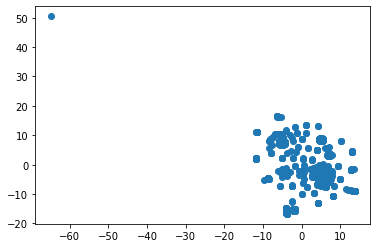

In [19]:
# Plot t-SNE output


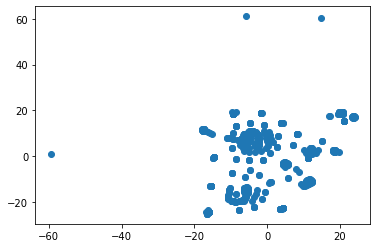

In [55]:
df9['x'] = tsne_features[:,0]
df9['y'] = tsne_features[:,1]
plt.scatter(df9['x'],df9['y'])
plt.show()

In [57]:
df10 = df9[['x','y']]
df10.head()

,x,y
0,-5.746155,-13.564590
1,-10.720353,-18.505024
2,-16.224768,-23.500622
3,20.788830,19.272005
4,-1.628864,18.800964


In [62]:
# Identify clusters with k-means
inertia = []
k = list(range(1,11))
for i in k:
    km = KMeans(n_clusters = i)
    km.fit(df10)
    inertia.append(km.inertia_)

C:\Users\jaw_m\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


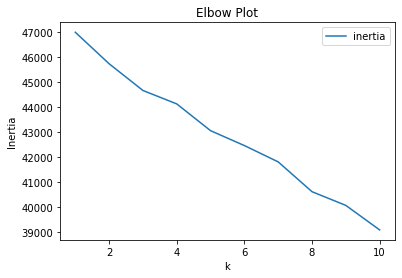

In [21]:
# Create an elbow plot


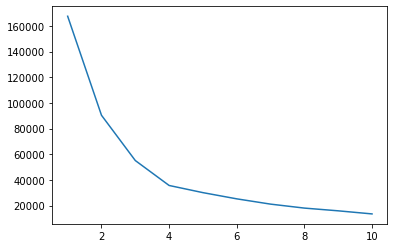

In [64]:
elbow_data = {"k":k,"inertia":inertia}
df11 = pd.DataFrame(elbow_data)
plt.plot(df11['k'],df11['inertia'])
plt.show()

In [ ]:
"""
It is possible to create a classification system for the investment. The cryptocurrencies can be grouped into approximately 
4 clusters. 
"""